#Machine learning intro assignment

Q1.Explain the differences between AI, ML, Deep Learning (DL), and Data
Science (DS).
  - AI is the broader field of developing intelligent machines,
  - ML is a subset of AI that involves training algorithms to learn from data,
  - DL is a subset of ML that uses ANNs to model complex patterns in data,
  -  and DS is an interdisciplinary field that involves extracting insights from data

Q2. : What are the types of machine learning? Describe each with one
real-world example.
  - Supervised Learning, which uses labeled data for predictions;
    - EX - spam email detection
  - Unsupervised Learning, which finds patterns in unlabeled data
    - EX - customer segmentation
  - Reinforcement Learning, where an agent learns through trial-and-error via rewards and penalties in an interactive environment
    - self driving car utilize reinforcement learning

Q3. Define overfitting, underfitting, and the bias-variance tradeoff in machine
learning
  - Underfitting occurs when a machine learning model is too simple and fails to capture the underlying patterns in the data, leading to high bias and poor performance on both training and new data.
  - Overfitting happens when a model is too complex and fits the training data too closely, including noise and random fluctuations, resulting in high variance and excellent performance on training data but poor generalization to unseen data
  - The bias-variance tradeoff is the challenge of finding a balance between these two competing sources of error to create a model that generalizes well.  

Q4. What are outliers in a dataset, and list three common techniques for
handling them.
  - An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal.
  -  techniques to detect outliers: boxplots, Z-score method, interquartile range (IQR) method.

Q5.  Explain the process of handling missing values and mention one
imputation technique for numerical and one for categorical data.
  - Handling missing values involves identifying them, understanding their nature, and then applying a suitable imputation (filling) technique or deletion.
  - For numerical data, a common imputation technique is Mean/Median Imputation, where missing values are replaced with the mean or median of the column. For categorical data, a common technique is Mode Imputation, where missing values are replaced with the most frequent category (mode) of the variable.


    

In [1]:
# Q6. Write a Python program that: ● Creates a synthetic imbalanced dataset with make_classification() from sklearn.datasets. ● Prints the class distribution.

from sklearn.datasets import make_classification
from collections import Counter

X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=2,
    n_redundant=2,
    n_classes=2,
    weights=[0.9, 0.1],
    random_state=42
)


print("Class distribution:", Counter(y))



Class distribution: Counter({np.int64(0): 897, np.int64(1): 103})


In [2]:
''': Implement one-hot encoding using pandas for the following list of colors:
['Red', 'Green', 'Blue', 'Green', 'Red']. Print the resulting dataframe'''

import pandas as pd

colors = ['Red', 'Green', 'Blue', 'Green', 'Red']
df = pd.DataFrame(colors, columns=['Color'])

one_hot = pd.get_dummies(df['Color'])

print(one_hot)


    Blue  Green    Red
0  False  False   True
1  False   True  False
2   True  False  False
3  False   True  False
4  False  False   True


/tmp/ipython-input-4235543894.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed['Values'].fillna(df_imputed['Values'].mean(), inplace=True)


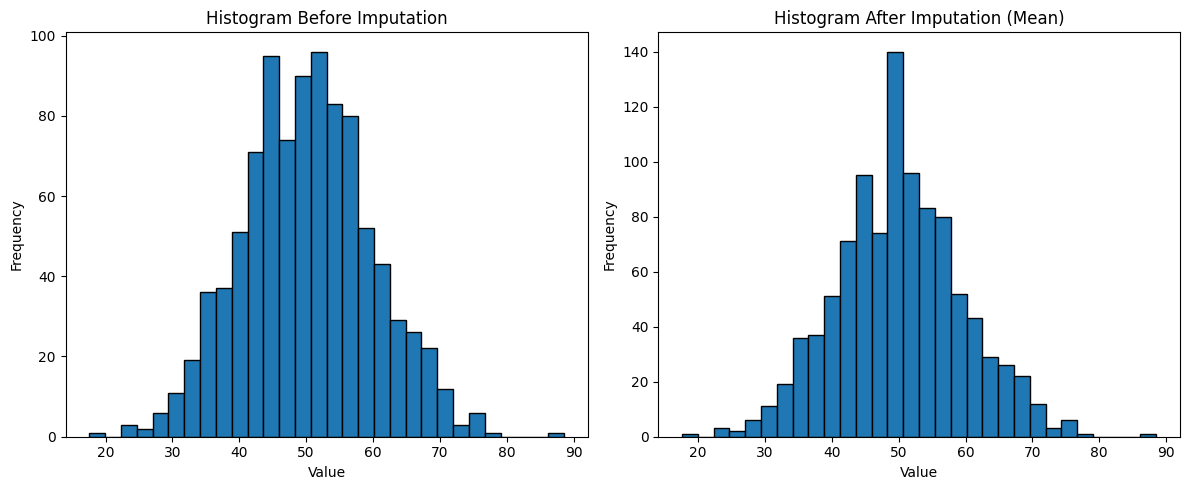

In [3]:
''': Write a Python script to:
● Generate 1000 samples from a normal distribution.
● Introduce 50 random missing values.
● Fill missing values with the column mean.
● Plot a histogram before and after imputation'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=1000)

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Values'])

# Step 2: Introduce 50 random missing values
missing_indices = np.random.choice(df.index, size=50, replace=False)
df.loc[missing_indices, 'Values'] = np.nan

# Step 3: Fill missing values with column mean
df_imputed = df.copy()
df_imputed['Values'].fillna(df_imputed['Values'].mean(), inplace=True)

# Step 4: Plot histogram before and after imputation
plt.figure(figsize=(12, 5))

# Before imputation
plt.subplot(1, 2, 1)
plt.hist(df['Values'].dropna(), bins=30, edgecolor='black')
plt.title("Histogram Before Imputation")
plt.xlabel("Value")
plt.ylabel("Frequency")

# After imputation
plt.subplot(1, 2, 2)
plt.hist(df_imputed['Values'], bins=30, edgecolor='black')
plt.title("Histogram After Imputation (Mean)")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [4]:
''' Implement Min-Max scaling on the following list of numbers [2, 5, 10, 15,
20] using sklearn.preprocessing.MinMaxScaler. Print the scaled array '''

from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = np.array([2, 5, 10, 15, 20]).reshape(-1, 1)

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data)

print("Scaled Array:\n", scaled_data)


Scaled Array:
 [[0.        ]
 [0.16666667]
 [0.44444444]
 [0.72222222]
 [1.        ]]


Q10 You are working as a data scientist for a retail company. You receive a customer
transaction dataset that contains:
● Missing ages,
● Outliers in transaction amount,
● A highly imbalanced target (fraud vs. non-fraud),
● Categorical variables like payment method.
Explain the step-by-step data preparation plan you’d follow before training a machine learning
model. Include how you’d address missing data, outliers, imbalance, and encoding.

 1. Handle Missing Ages
  - Why: Age is often an important predictor. Missing values could bias results.
  - Approach:
    - If missing values are few, impute with median age (robust to outliers).
    - If many values are missing, use a predictive imputer (e.g., KNNImputer or regression-based imputation).
    - Add a “missing_age” flag as a new feature to capture missingness

  2. Handle Outliers in Transaction Amount
  -  Why: Extreme values might signal fraud, but they can also distort models.
  - Approach:
    - Detect using IQR method or z-scores.
    - for normal modeling: clip or log-transform values to reduce skewness.
    - For fraud detection: keep them (they may contain signal).
    - Consider using robust scaling (less sensitive to outliers than MinMax or Standard scaling).

 3. Address Imbalanced Target (Fraud vs. Non-Fraud)
  - Why: Most transactions are non-fraud, so models may ignore fraud cases.
  - Approach:
    - Resampling:
      - Oversample fraud (e.g., SMOTE)
      - Undersample non-fraud (random undersampling or NearMiss)
    - Algorithmic solutions: Use models that support class weights (e.g., Logistic Regression, Random Forest, XGBoost).
    - Evaluation: Use precision, recall, F1, AUC-ROC instead of accuracy.

  4. Encode Categorical Variables (e.g., Payment Method)
  - Why: ML models need numeric inputs.
  - Approach:
    - If few categories: One-Hot Encoding (pd.get_dummies or OneHotEncoder).
    - If many categories: Target encoding or frequency encoding.
    - Make sure to fit encoders only on training data to avoid leakage.

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# -----------------------------
# Example Synthetic Dataset
# -----------------------------
data = {
    "age": [25, np.nan, 40, 35, np.nan, 50, 45, 38],
    "transaction_amount": [200, 50000, 150, 300, 100000, 250, 180, 350],
    "payment_method": ["CreditCard", "DebitCard", "UPI", "CreditCard", "Wallet", "UPI", "DebitCard", "Wallet"],
    "is_fraud": [0, 1, 0, 0, 1, 0, 0, 0]
}

df = pd.DataFrame(data)

# Features and target
X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

# -----------------------------
# Preprocessing
# -----------------------------
numeric_features = ["age", "transaction_amount"]
categorical_features = ["payment_method"]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),   # handle missing ages
    ("scaler", RobustScaler())                       # handle outliers
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))  # encode payment method
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# -----------------------------
# Full Pipeline with SMOTE
# -----------------------------
model = LogisticRegression(class_weight="balanced", max_iter=1000)

pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", model)
])

# -----------------------------
# Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Fit model
pipeline.fit(X_train, y_train)

# Evaluate
print("Train Accuracy:", pipeline.score(X_train, y_train))
print("Test Accuracy:", pipeline.score(X_test, y_test))

# Transform a sample to see preprocessing
print("\nTransformed features (first row):")
print(pipeline.named_steps["preprocessor"].transform(X_train)[:1])


ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 1, n_samples = 1